
# <p style="text-align: center;">MIS 382: Advanced Predictive Modelling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Wednesday, November 8th, submitted via Canvas by 11:59 pm</p>

### <p style='text-align: center;'> Submitted By: Matt Barrett (mb58428) and Brett Scroggins (bas4784)

Your homework should be written in a **Jupyter notebook**. You may work in groups if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for all students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bayesian Classifiers (15 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Bayesian classifiers (LDA, QDA and Naive Bayes) The code below loads the dataset and all necessary sklearn modules. Look up any module on the scikit-learn website for a full description.

1. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the class being digits 8 or digits 9 for every row. 
2. Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line) 
3. Report the area under the ROC curve (AUC) for each model. (5 pts for each model. Total of 15 pts)

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [3]:
idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800, 784), (11800,), (1983, 784), (1983,))


## Solutions

In [4]:
# Linear Discriminant Analysis

lda = LDA()
lda.fit(X_train, y_train)
lda_train = lda.predict_proba(X_test)
lda_train

/Users/brettscroggins/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[  9.99740516e-01,   2.59484124e-04],
       [  9.99999830e-01,   1.69840181e-07],
       [  9.99978789e-01,   2.12106777e-05],
       ..., 
       [  2.82800672e-09,   9.99999997e-01],
       [  5.97602137e-08,   9.99999940e-01],
       [  1.59061098e-09,   9.99999998e-01]])

In [5]:
# Quadratic Discriminant Analysis
qda = QDA()
qda.fit(X_train, y_train)
qda_train = qda.predict_proba(X_test)
qda_train

/Users/brettscroggins/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([[  1.00000000e+000,   8.79462398e-314],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   0.00000000e+000],
       ..., 
       [  0.00000000e+000,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000]])

In [6]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_train = gnb.predict_proba(X_test)
gnb_train

array([[  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   0.00000000e+000],
       ..., 
       [  4.29907815e-178,   1.00000000e+000],
       [  2.35127896e-114,   1.00000000e+000],
       [  1.72617317e-182,   1.00000000e+000]])

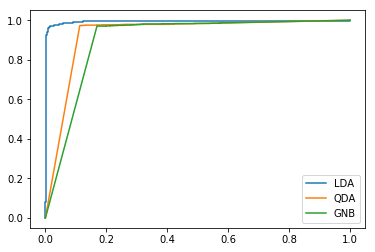

In [7]:
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, lda_train[:, 1])
plt.plot(lda_fpr, lda_tpr,label='LDA')

qda_fpr, qda_tpr, qda_thresholds = roc_curve(y_test, qda_train[:, 1])
plt.plot(qda_fpr, qda_tpr,label='QDA')

gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_train[:, 1])
plt.plot(gnb_fpr, gnb_tpr,label='GNB')

plt.legend()
plt.show()

In [8]:
print "The AUC for LDA: {}".format(round(roc_auc_score(y_test, lda_train[:, 1]),3))
print "The AUC for QDA: {}".format(round(roc_auc_score(y_test, qda_train[:, 1]),3))
print "The AUC for GNB: {}".format(round(roc_auc_score(y_test, gnb_train[:, 1]),3))

The AUC for LDA: 0.994
The AUC for QDA: 0.93
The AUC for GNB: 0.902


# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

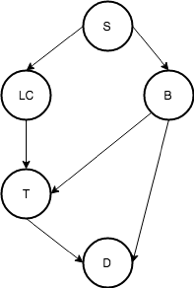

In [9]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

## Solutions
** Note: See the pictures for work shown below.

#### a) P(D = yes) = 6.132%

#### b) P(LC = no, B = yes, D = yes) = 1.601%

#### c) P(D = yes | B = yes, LC = no) = 67.706%

#### d) P(T = yes | S = yes) = 0.643%

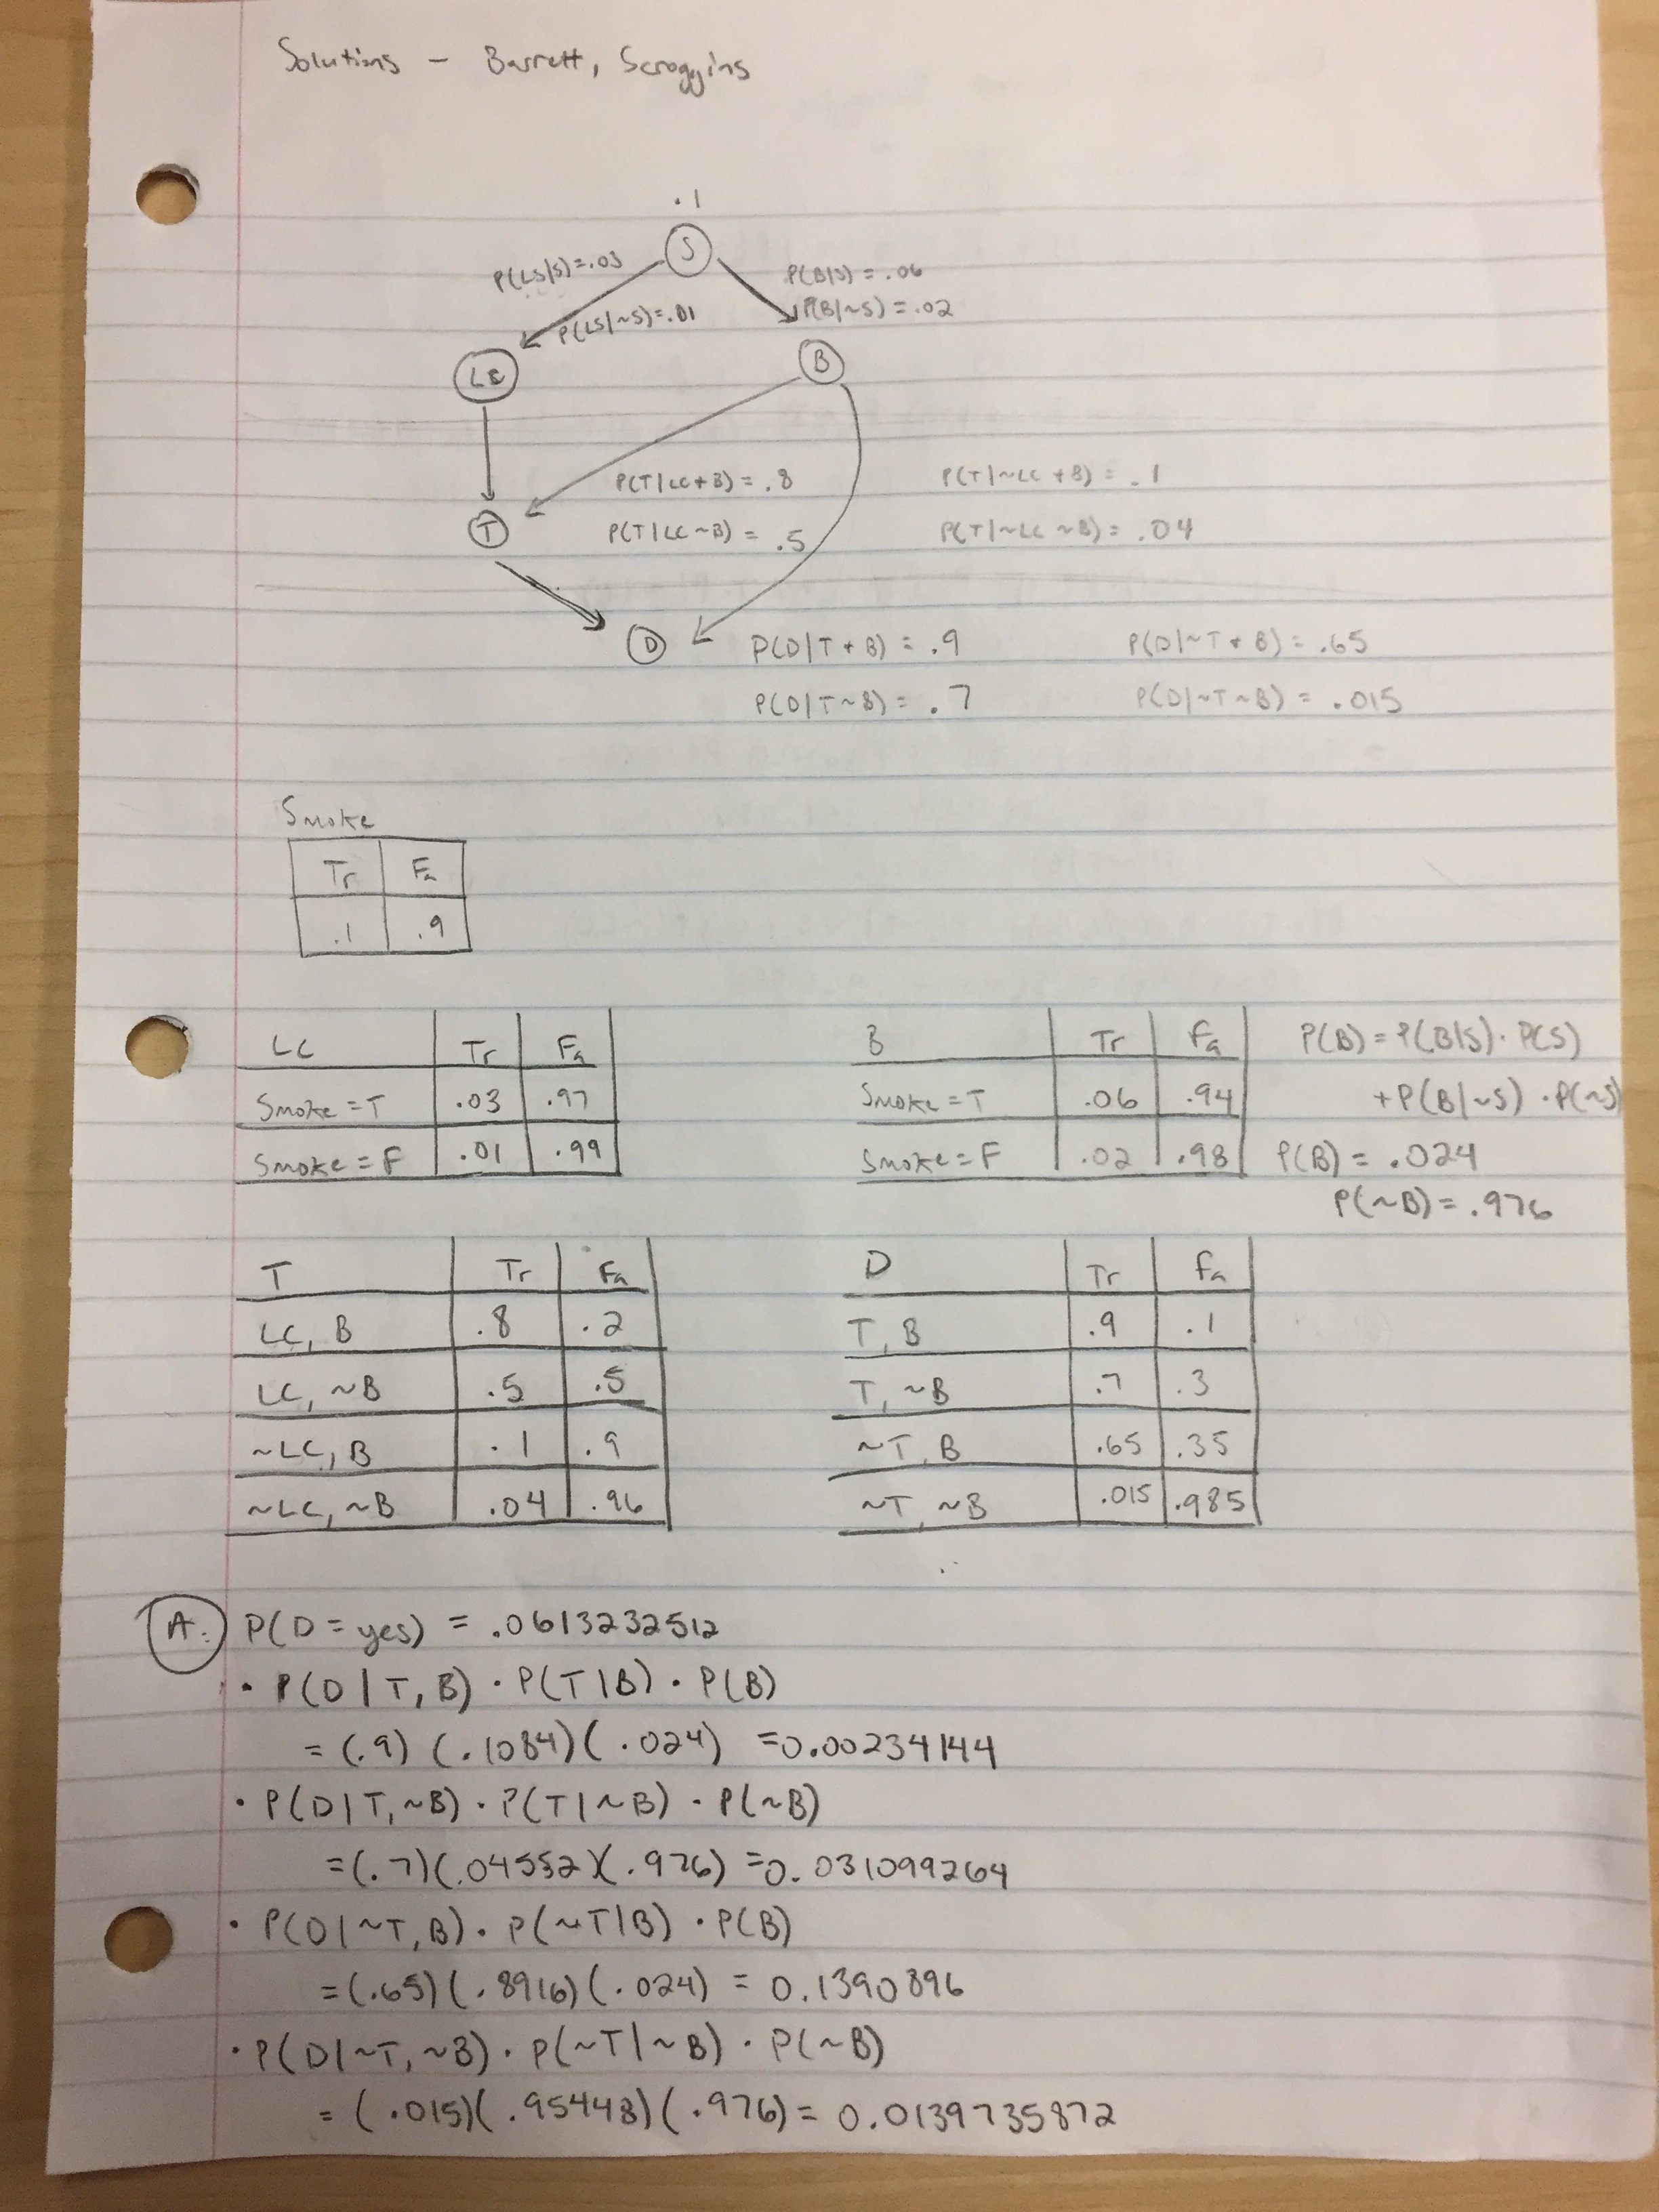

In [10]:
Image(filename='Solutions1.jpg')

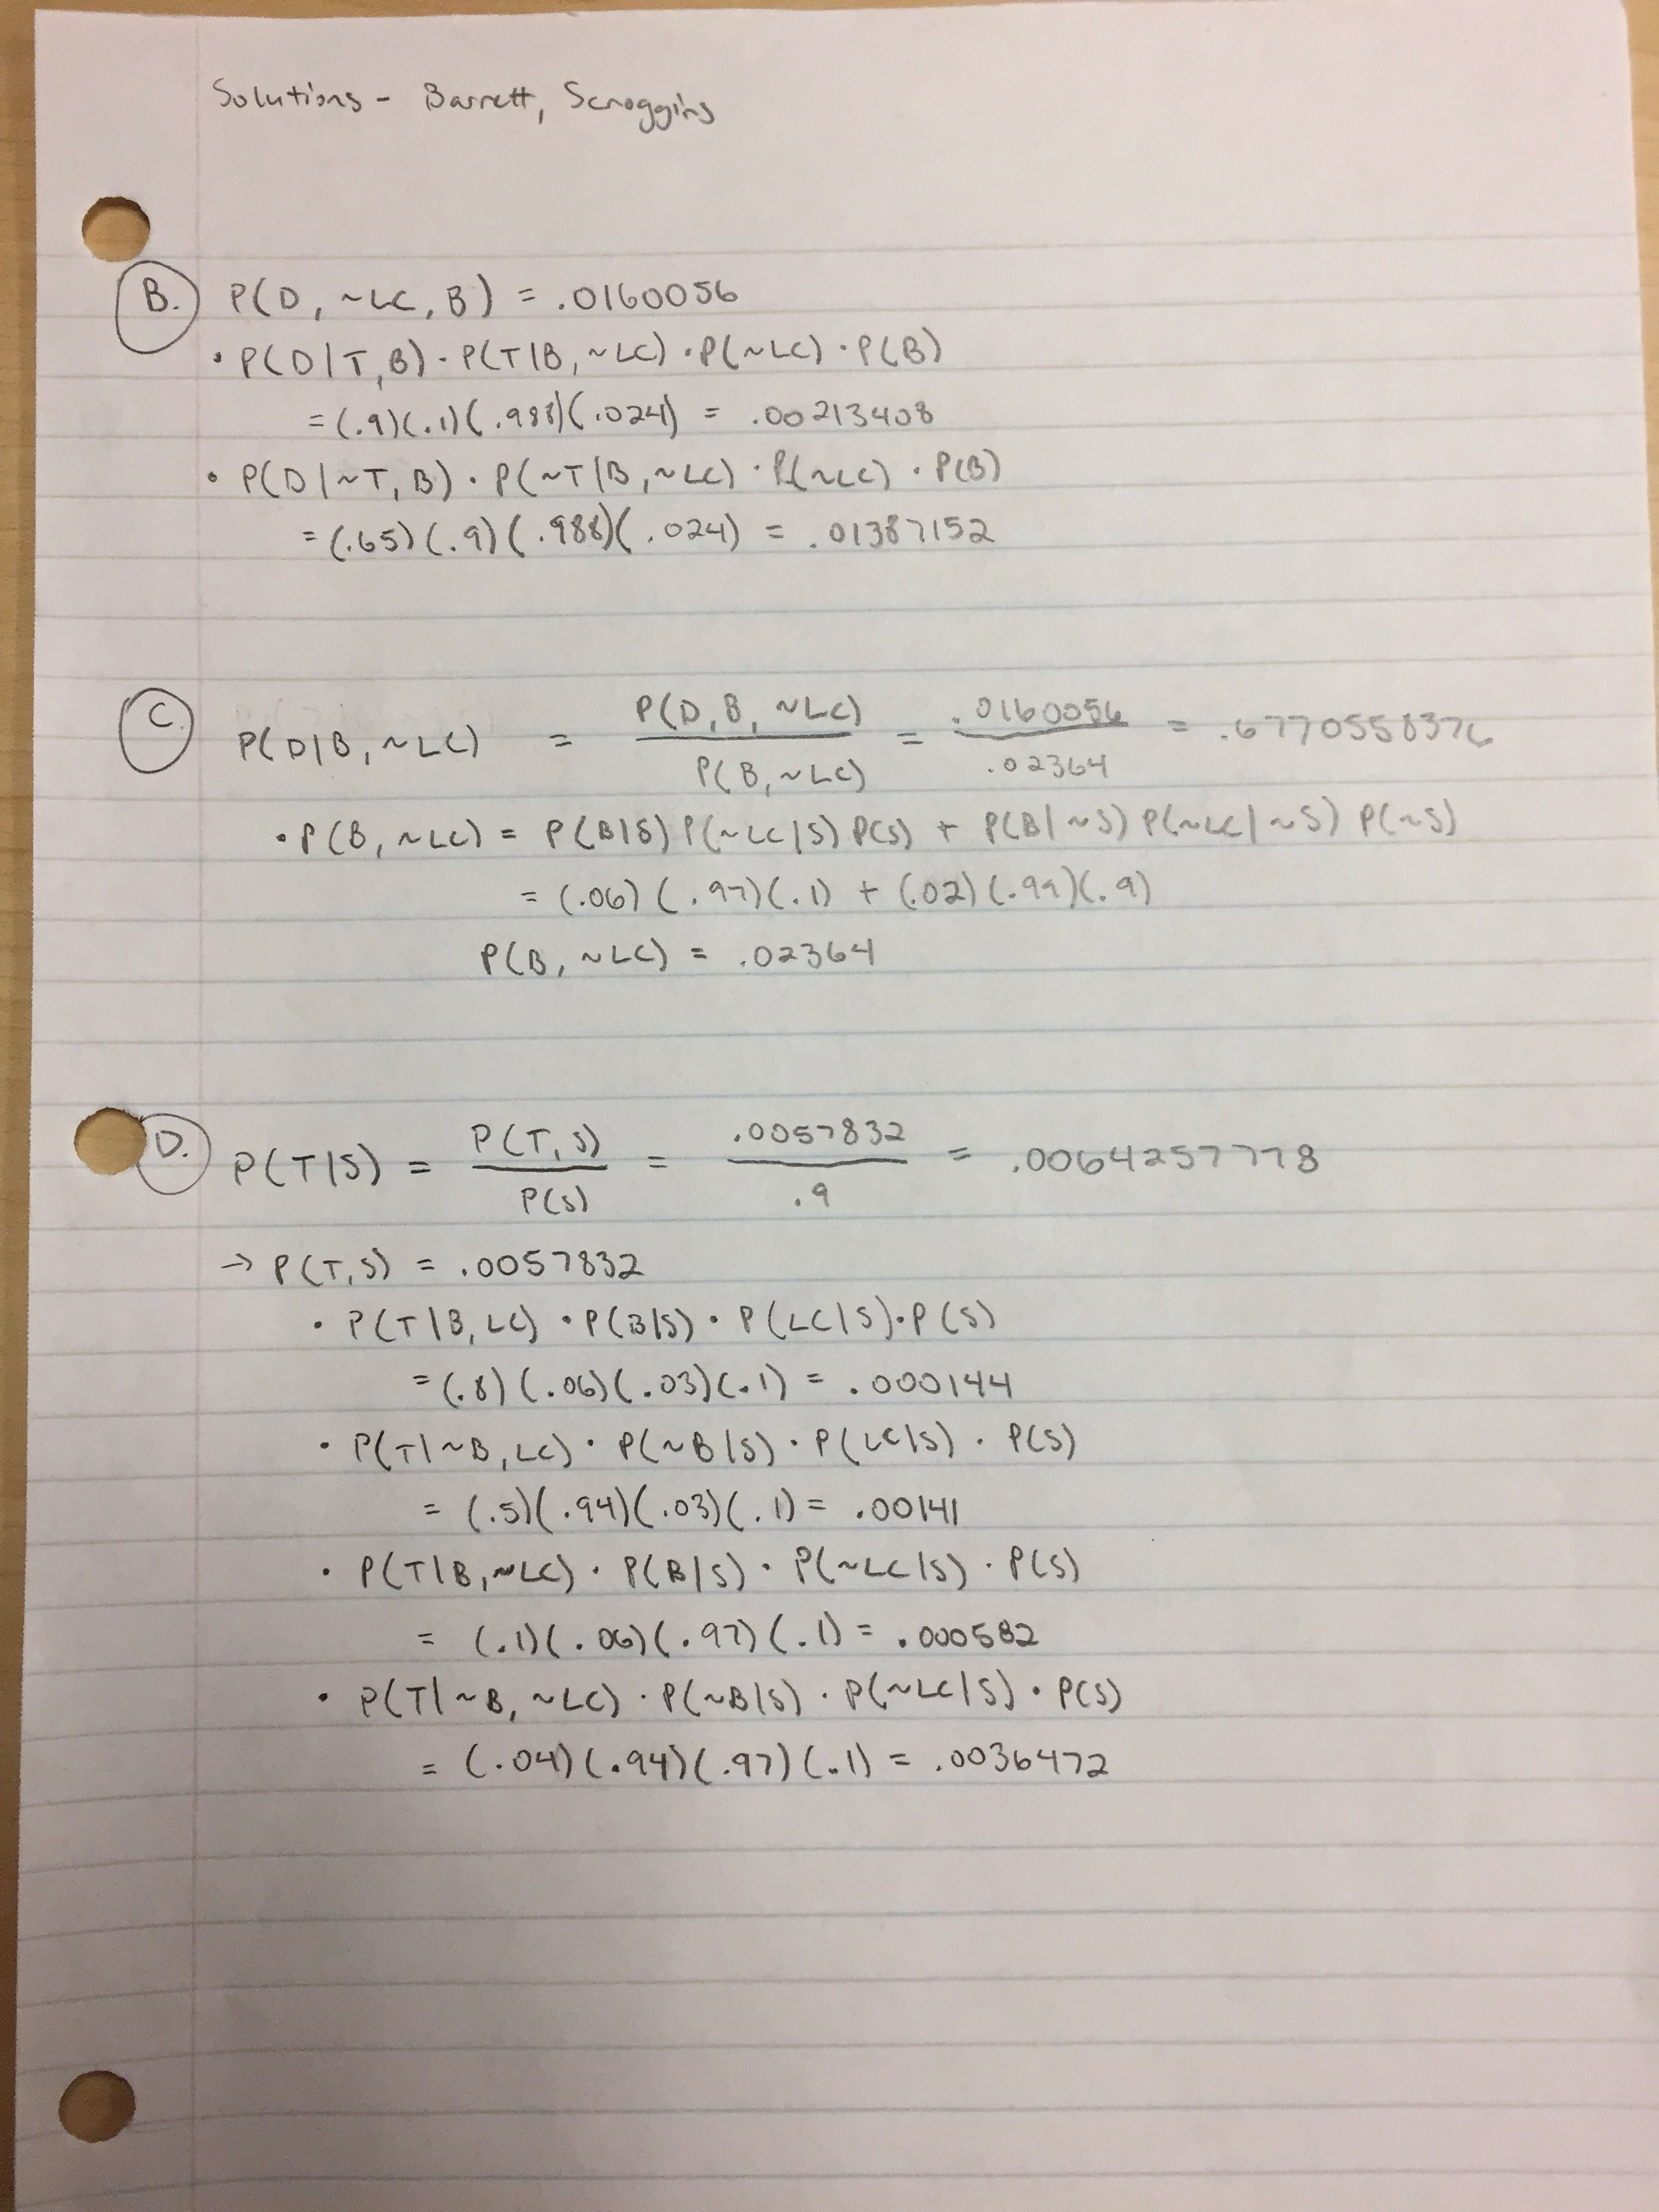

In [11]:
Image(filename='Solutions2.jpg')

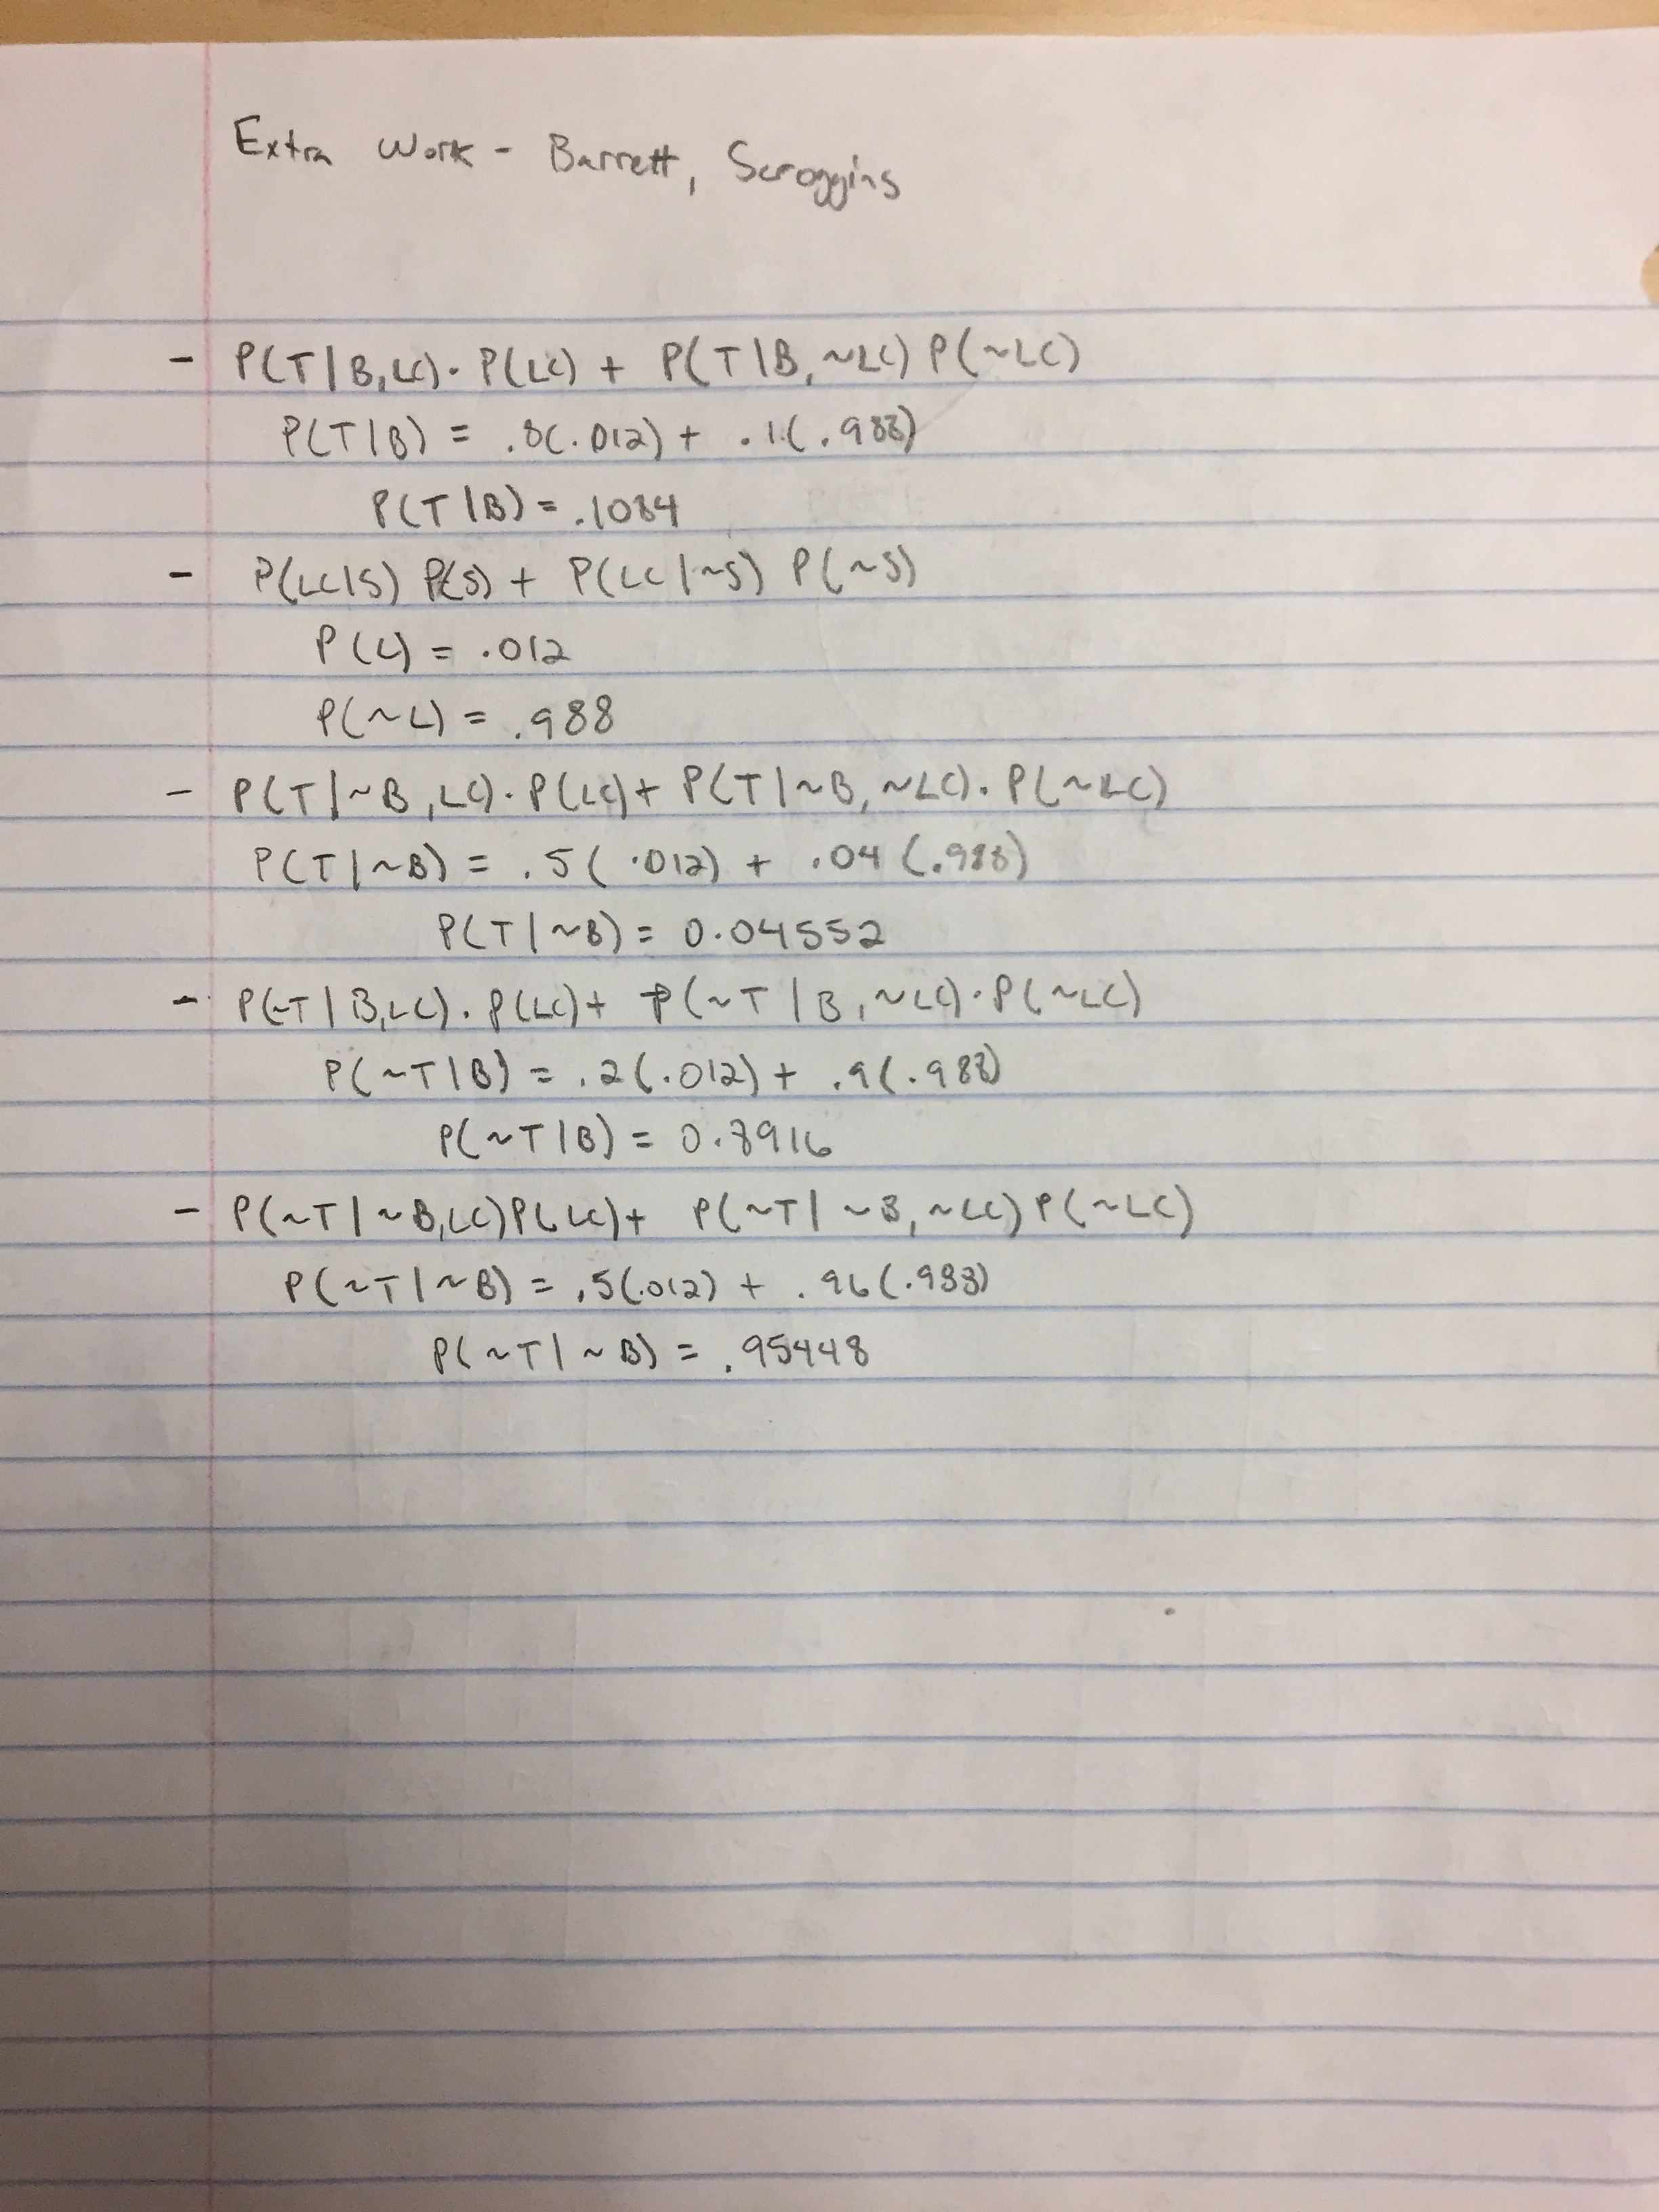

In [12]:
Image(filename='Solutions3.jpg')

# Question 3 - Logistic Regression Classification (15pts)

Using the MNIST dataset in Q1, the goal is to build a Logistic Regression classifier to classify between digits $\textbf{8 and 9}$.  Note that the imported MNIST dataset has 10 labels, from digits 0 to 9.  Use the code below to access the data set and extract the MNIST data.

In [13]:
# Use code from Q1 to import the data

1. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
2. Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
3. Repeat question 2 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (3pts)
4. Using the optimal regularization parameter obtained in step 2, train a logistic regression classifier with ridge penalty to clasify $\textbf{all 10 digits}$ (digits 0,1,2,3,...9) of the MNIST dataset.  Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)

## Solutions

In [14]:
from sklearn.datasets import fetch_mldata
import numpy as np

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X = (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800, 784), (11800,), (1983, 784), (1983,))


#### Part 1

In [15]:
#1
from sklearn.linear_model import LogisticRegression
lr_l2 = LogisticRegression(C=1000000,penalty='l2')
lr_l2.fit(X_train,y_train)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import confusion_matrix
y_hat = lr_l2.predict(X_test)
conf_mat = confusion_matrix(y_test,y_hat)
conf_mat

array([[940,  34],
       [ 35, 974]])

In [17]:
y0 = float(conf_mat[0,0])/float(sum(conf_mat[0,]))
print "Accuracy for y=0: {}".format(round(y0,3))

y1 = float(conf_mat[1,1])/float(sum(conf_mat[1,]))
print 'Accuracy for y=1: {}'.format(round(y1,3))

avg_pc = float(np.sum(np.diagonal(conf_mat)))/np.sum(conf_mat)
print "Average per-class accuracy: {}".format(round(avg_pc,3))

Accuracy for y=0: 0.965
Accuracy for y=1: 0.965
Average per-class accuracy: 0.965


#### Part 2

In [18]:
#2
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def class_accuracy(ground_truth, predictions):
    conf_mat = confusion_matrix(ground_truth,predictions)
    accuracy = float(np.sum(np.diagonal(conf_mat)))/float(np.sum(conf_mat))
    return accuracy

/Users/brettscroggins/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/brettscroggins/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
class_acc = make_scorer(class_accuracy, greater_is_better=True)
c_values = {'C':[0.01,0.1, 1, 10 ,100]}

lr_l2_grid = GridSearchCV(lr_l2, c_values, cv = 3, 
                          scoring= class_acc)

lr_l2_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=make_scorer(class_accuracy), verbose=0)

In [20]:
print 'Max average is from {} and has accuracy {}'.format(lr_l2_grid.best_params_,
                                                          round(lr_l2_grid.best_score_,3))

Max average is from {'C': 1} and has accuracy 0.983


#### Part 3

In [21]:
#3
lr_l1 = LogisticRegression(C=1000000,penalty='l1')

lr_l1_grid = GridSearchCV(lr_l1, c_values, cv = 3, 
                          scoring= class_acc)

lr_l1_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=make_scorer(class_accuracy), verbose=0)

In [22]:
print 'Max average is from {} and has accuracy {}'.format(lr_l1_grid.best_params_,
                                                          round(lr_l1_grid.best_score_,3))

Max average is from {'C': 1} and has accuracy 0.981


#### Comparison of Models:

Based on the three models fitted above, the best fit was the Logistic Regression with the L2 regularization and C value of 1. This outweighs a similar model with L1 regularization slightly, while also outperforming the previously fitted models with different C values. For this case the best recommendation would be Logistic Regression with L2 regularization, but this does not indicate that this model would outperform on every dataset in every situation.

#### Part 4

In [23]:
X = (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [24]:
#4
best_lr = LogisticRegression(C=1, penalty = 'l2', solver = 'newton-cg',multi_class = 'multinomial')
best_lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_hat = best_lr.predict(X_test)
lr_conf_mat = confusion_matrix(y_test, y_hat)

In [26]:
print 'Average per-class accuracy: {}'.format(round(class_accuracy(y_test,y_hat),3))

Average per-class accuracy: 0.926


In [27]:
lr_conf_mat

array([[ 955,    0,    2,    4,    1,   10,    4,    3,    1,    0],
       [   0, 1110,    5,    2,    0,    2,    3,    2,   11,    0],
       [   6,    9,  930,   14,   10,    3,   12,   10,   34,    4],
       [   4,    1,   16,  925,    1,   23,    2,   10,   19,    9],
       [   1,    3,    7,    3,  921,    0,    6,    5,    6,   30],
       [   9,    2,    3,   35,   10,  777,   15,    6,   31,    4],
       [   8,    3,    8,    2,    6,   16,  912,    2,    1,    0],
       [   1,    7,   23,    7,    6,    1,    0,  947,    4,   32],
       [   9,   11,    6,   22,    7,   29,   13,   10,  855,   12],
       [   9,    8,    1,    9,   21,    7,    0,   21,    9,  924]])

# Question 4: Regression Trees (6+5+4 = 15 points)
In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. 

You will be using an NBA dataset (nbasalariesfull.csv) to predict a player’s Salary using all the numeric performance variables available ( so everything but Player, Team, and Position ). 

- a. Use a random state of 42 and a test size of 1/3 to split the data into training and test.
     
         Build a regression using DecisionTreeRegressor with max_depth = 6. 
         Report the mean squared errors on both training and test datasets.( 6 points )


- b. Repeat Part-1 with max_depth = 2. (5 points )


- c. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 6 and 2? 
         Which tree is better and why? ( 4 points )

## Solutions

In [28]:
from sklearn import tree
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
nba = pd.read_csv('/Users/brettscroggins/Downloads/nbasalariesfull.csv')
nba_x = nba.drop('SALARY', axis = 1)
nba_x = nba_x[nba_x.columns[3:]]
nba_y= nba['SALARY']/1000000

In [30]:
X_train, X_test, y_train, y_test = train_test_split(nba_x, nba_y, test_size = 0.33
                                                    , random_state = 42)

#### Part A

In [31]:
## Part A

dtr_4a = tree.DecisionTreeRegressor(max_depth=6)
dtr_4a.fit(X_train, y_train)

train_mse_a = mean_squared_error(y_train, dtr_4a.predict(X_train))
test_mse_a = mean_squared_error(y_test, dtr_4a.predict(X_test))

print "Part A Train MSE: ${} MM".format(round(train_mse_a,3))
print "Part A Test MSE: ${} MM".format(round(test_mse_a,3))

Part A Train MSE: $3.109 MM
Part A Test MSE: $20.692 MM


#### Part B

In [32]:
## Part B

dtr_4b = tree.DecisionTreeRegressor(max_depth=2)
dtr_4b.fit(X_train, y_train)

train_mse_b = mean_squared_error(y_train, dtr_4b.predict(X_train))
test_mse_b = mean_squared_error(y_test, dtr_4b.predict(X_test))

print "Part B Train MSE: ${} MM".format(round(train_mse_b,3))
print "Part B Test MSE: ${} MM".format(round(test_mse_b,3))

Part B Train MSE: $12.138 MM
Part B Test MSE: $16.856 MM


#### Part C

The train MSE value for the forest depth of 6 is significantly better than the forest with depth 2. This matches with expectations. However, this higher accuracy in the training set does not translate to the test set; where the lower depth outperforms the former model. This is indicative of the model with depth 6 being overfitted to the training set.

# Question 5.  AUC vs Lift Curve ( 5 points )
Describe the similarities and differences between AUC and Lift Curves.

## Solution

The area under the curve (AUC) and a Lift Curve for classifications models are both used to measure the effectiveness of the regression. For an AUC, the closer the value is to 1 (or 100%), the better the fit is. For a Lift Curve, the higher the value is above 1, the better that fit is. Values close to 1 or below 1 are indicators of a poor model with lift curves, as opposed to values close to or below 0.5 are indicators of poor models for AUC values.

The differences in these two come from how they measure the fit of the model.
- AUC measures the area under the ROC curve and it determines the percentage of correctly classified outcomes. The higher the curve and corresponding area beneath, the better the ratio of true positives compared to false positives.
- A Lift Curve measures the amount of the model correctly classifing compared with the base rate of doing so. This does not have to deal with the ROC curve like AUC does, and only deal with identifying correctly. This allows for a stronger insight for classifications that have a low base accuracy. 